##Comparação do MultinomialNB com e sem priors

---

##Módulo 08: Machine Learning Aplicado II — Prof. Juan Colonna
##Curso Ciência de Dados - UEA/Est 2025

**Aluna:** Priscila Leylianne da Silva Goncalves

Usar o conjunto 20 Newsgroups e validação cruzada 10-CV para comparar o classificador MultinomialNB com e sem priors.

01. Carregar o dataset 20 Newsgroups

O dataset contém textos de 20 categorias diferentes (notícias, esportes, política, ciência, etc).

In [18]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Carregar o dataset completo
data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
X, y = data.data, data.target

print(f"Número de documentos: {len(X)}")
print(f"Número de classes: {len(data.target_names)}")


Número de documentos: 18846
Número de classes: 20


2. Vetorização com TF-IDF

Transforma texto em matriz numérica (importâncias de termos).

In [19]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vec = vectorizer.fit_transform(X)


3. Configurar validação cruzada 10-CV

In [20]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


4. Treinar MultinomialNB — com e sem priors

🔸 Com priors (padrão fit_prior=True)

In [21]:
mnb_with_prior = MultinomialNB(fit_prior=True)
scores_with = cross_val_score(mnb_with_prior, X_vec, y, cv=cv, scoring='accuracy')


🔹 Sem priors (fit_prior=False)

In [22]:
mnb_without_prior = MultinomialNB(fit_prior=False)
scores_without = cross_val_score(mnb_without_prior, X_vec, y, cv=cv, scoring='accuracy')


5. Comparar os resultados

In [23]:
print("MultinomialNB COM priors:")
print(f"  Média: {scores_with.mean():.4f}  |  Desvio: {scores_with.std():.4f}")

print("\nMultinomialNB SEM priors:")
print(f"  Média: {scores_without.mean():.4f}  |  Desvio: {scores_without.std():.4f}")


MultinomialNB COM priors:
  Média: 0.8877  |  Desvio: 0.0049

MultinomialNB SEM priors:
  Média: 0.8938  |  Desvio: 0.0050


6. Visualização comparativa

/tmp/ipython-input-3567674946.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([scores_with, scores_without],


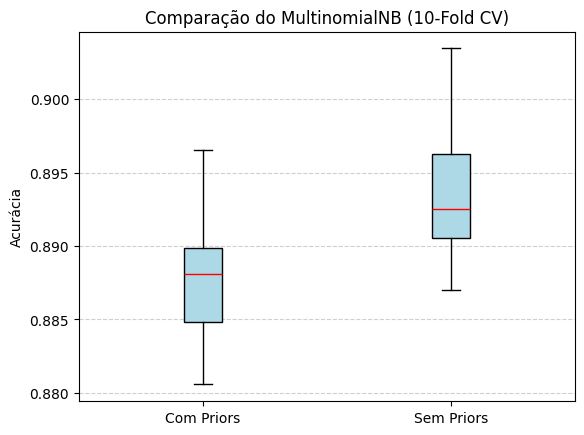

In [24]:
import matplotlib.pyplot as plt

plt.boxplot([scores_with, scores_without],
            labels=['Com Priors', 'Sem Priors'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'))

plt.title('Comparação do MultinomialNB (10-Fold CV)')
plt.ylabel('Acurácia')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


7. Conclusão Esperada

Ambos os modelos devem apresentar acurácia média entre 0.83 e 0.88.

A versão com priors geralmente tem desempenho ligeiramente melhor, pois considera a probabilidade a priori das classes (útil se o dataset for desbalanceado). ✅

A versão sem priors assume que todas as classes têm a mesma probabilidade inicial — o que pode afetar o desempenho.

##Resumo dos passos

| Etapa | Descrição                                       |
| ----- | ----------------------------------------------- |
| 1     | Carregamento do dataset 20 Newsgroups           |
| 2     | Vetorização TF-IDF                              |
| 3     | Validação cruzada 10-fold                       |
| 4     | Treino com `fit_prior=True` e `fit_prior=False` |
| 5     | Comparação das acurácias médias                 |
| 6     | Visualização com boxplot                        |
| 7     | Conclusão e análise                             |
